In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx

In [2]:
from owslib.wms import WebMapService
wms = WebMapService('http://mapservices.onemap.sg/mapproxy/service?REQUEST=GetCapabilities&SERVICE=WMTS', version='1.1.1')
wms.identification.title

'MapProxy WMS'

In [3]:
list(wms.contents)

['Default',
 'Original',
 'Grey',
 'Night',
 'singapore_3414_tms',
 'singapore_3414_wms',
 'singapore_3414_wmts',
 'singapore_landlot_wmts']

In [4]:
wms['Grey'].crsOptions

['EPSG:3414', 'EPSG:4326']

In [5]:
wms['Grey'].boundingBox

(103.359, 1.054, 104.766, 1.76, 'EPSG:4326')

In [6]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

In [7]:
xmin,xmax = 1000,54000
ymin,ymax = 14000,51000
ratio = (ymax-ymin)/(xmax-xmin)

img = wms.getmap(layers=['Grey'],
                 styles=[''],
                 srs='EPSG:3414',
                 bbox=[xmin,ymin,xmax,ymax],
                 size=[1000,int(1000*ratio)],
                 format='image/png',
                 transparent=True
                 )

In [8]:
with open('test.png','wb') as file:
    file.write(img.read())

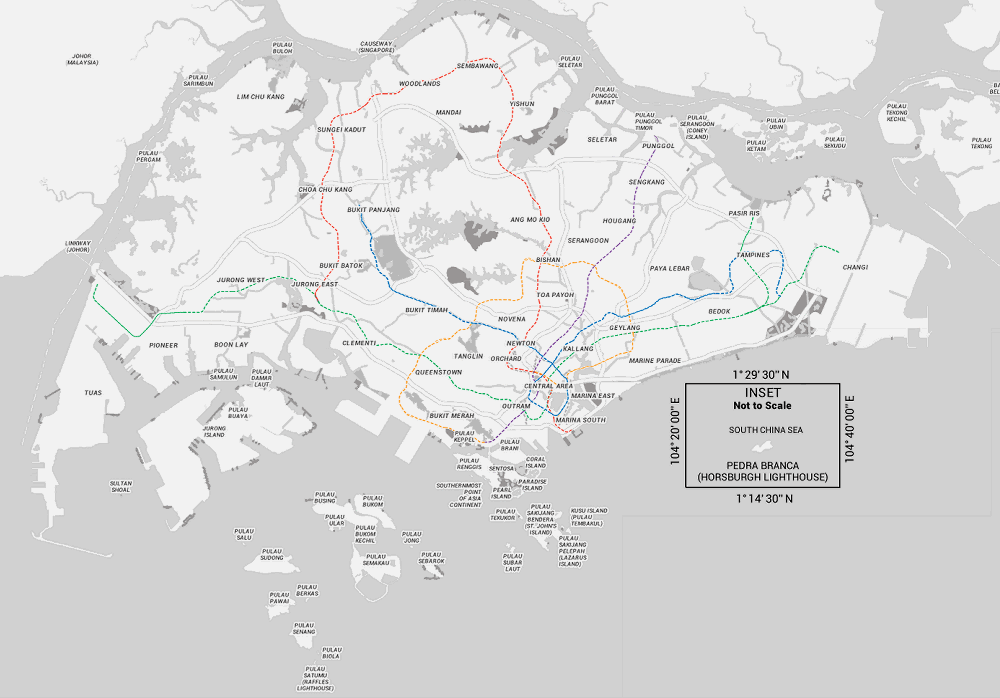

In [9]:
from IPython.display import Image
Image('test.png')

In [24]:
import numpy as np

def rgb2grey(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    grey = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return grey * 0.5

In [ ]:
plt.figure(dpi=300)
data = rgb2grey(plt.imread('test.png'))
plt.imshow(data, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

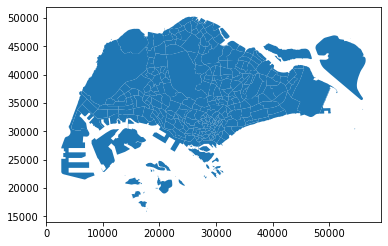

In [26]:
import geopandas as gpd

sz = gpd.read_file('subzones_ura/MP14_SUBZONE_WEB_PL.shp') #.to_crs('EPSG:4326')
sz.plot()

In [27]:
sz.total_bounds

array([ 2667.538 , 15748.721 , 56396.44  , 50256.3343])

In [28]:
sz.to_crs('EPSG:4326').total_bounds

array([103.60570071,   1.1586987 , 104.08848307,   1.47077483])

In [29]:
xmin, xmax = 1000, 54000
ymin, ymax = 13000, 50000

In [30]:
w, s, e, n = sz.to_crs('EPSG:4236').total_bounds

In [31]:
_ = ctx.howmany(w, s, e, n, 13, ll=True)

Using zoom level 13, this will download 96 tiles


In [32]:
%%time
#img, ext = ctx.bounds2img(w, s, e, n, 12, url='http://maps-b.onemap.sg/v2/Original/{z}/{x}/{y}.png', ll=True)
img, ext = ctx.bounds2img(w, s, e, n, 13, url=getattr(ctx.sources, 'ST_TERRAIN'), ll=True)

CPU times: user 123 ms, sys: 148 ms, total: 271 ms
Wall time: 278 ms


In [ ]:
#plt.xkcd()
plt.figure(dpi=300)
ax = plt.axes()
plt.grid(color='white', linestyle='dotted', linewidth=0.5)
data = rgb2grey(img)
ax.imshow(data, extent=ext, cmap=plt.get_cmap('gray'))
sz.to_crs('EPSG:3857').plot(ax=ax,facecolor='white',alpha=.7, edgecolor='red',lw=0.3)
plt.axis('tight')
xstart, xend = ax.get_xlim()
ystart, yend = ax.get_ylim()
plt.vlines(np.arange(xstart, xend, 10000),0,166000, colors='white', linestyles='dotted', linewidths=0.5)
plt.hlines(np.arange(ystart, yend, 10000),0,11589000, colors='white', linestyles='dotted', linewidths=0.5)
plt.xticks([])
plt.yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
extents = ax.axis()

title = plt.text(x=0.5,
         y=0.55,
         s="Results",
         horizontalalignment="center",
         verticalalignment="top",
         transform=ax.transAxes,
         bbox={'boxstyle':'circle',
               'facecolor':'white',
               'edgecolor':'k',
               'lw': 1,
               'pad': 0.5})

plt.show()
plt.close()

In [23]:
extents

(11530372.842762267, 11589076.480485283, 127191.2150665321, 166326.97354854314)

In [67]:
getattr(ctx.sources, 'ST_WATERCOLOR')

'http://tile.stamen.com/watercolor/{z}/{x}/{y}.png'

In [24]:
sources = [i for i in dir(ctx.tile_providers) if i[0] != '_']
sources'ST_TONER_LINES'

['OSM_A',
 'OSM_B',
 'OSM_C',
 'ST_TERRAIN',
 'ST_TERRAIN_BACKGROUND',
 'ST_TERRAIN_LABELS',
 'ST_TERRAIN_LINES',
 'ST_TONER',
 'ST_TONER_BACKGROUND',
 'ST_TONER_HYBRID',
 'ST_TONER_LINES',
 'ST_TONER_LITE',
 'ST_WATERCOLOR']

In [ ]:
http://maps-b.onemap.sg/v2/Grey/{z}/{x}/{y}.png 